1.3.1 Задание. Задайте 4 точки в трехмерном пространстве, рассчитайте между ними 
расстояния по описанным в примере выше метрикам. Отобразите точки 
в трехмерном пространстве. 

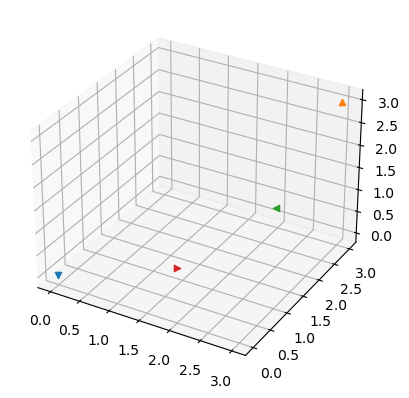

Расстояние между 1(v) и 2(^) точкой:
5.196152422706632
27.0
3.0
9.0

Расстояние между 1(v) и 3(<) точкой:
3.7416573867739413
14.0
3.0
6.0

Расстояние между 1(v) и 4(>) точкой:
2.23606797749979
5.000000000000001
2.0
3.0

Расстояние между 2(^) и 3(<) точкой:
2.23606797749979
5.000000000000001
2.0
3.0

Расстояние между 2(^) и 4(>) точкой:
3.7416573867739413
14.0
3.0
6.0

Расстояние между 3(^) и 4(>) точкой:
1.7320508075688772
2.9999999999999996
1.0
3.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

point1 = ax.scatter(0, 0, 0, marker ="v")
point2 = ax.scatter(3, 3, 3, marker = "^")
point3 = ax.scatter(3, 1, 2, marker = "<")
point4 = ax.scatter(2, 0, 1, marker = ">")

x = np.array([0, 0, 0])
y = np.array([3, 3, 3])
z = np.array([3, 1, 2])
w = np.array([2, 0, 1])

plt.show()

print("Расстояние между 1(v) и 2(^) точкой:")
print(np.linalg.norm(x-y))
print(np.linalg.norm(x-y) ** 2)
# Расстояние Чебышева
print(np.linalg.norm(x-y, ord = np.inf))
# Манхэттенское расстояние
print(np.linalg.norm(x-y, ord=1))

print("\nРасстояние между 1(v) и 3(<) точкой:")
print(np.linalg.norm(x-z))
print(np.linalg.norm(x-z) ** 2)
print(np.linalg.norm(x-z, ord = np.inf))
print(np.linalg.norm(x-z, ord=1))

print("\nРасстояние между 1(v) и 4(>) точкой:")
print(np.linalg.norm(x-w))
print(np.linalg.norm(x-w) ** 2)
print(np.linalg.norm(x-w, ord = np.inf))
print(np.linalg.norm(x-w, ord=1))

print("\nРасстояние между 2(^) и 3(<) точкой:")
print(np.linalg.norm(y-z))
print(np.linalg.norm(y-z) ** 2)
print(np.linalg.norm(y-z, ord = np.inf))
print(np.linalg.norm(y-z, ord=1))

print("\nРасстояние между 2(^) и 4(>) точкой:")
print(np.linalg.norm(y-w))
print(np.linalg.norm(y-w) ** 2)
print(np.linalg.norm(y-w, ord = np.inf))
print(np.linalg.norm(y-w, ord=1))

print("\nРасстояние между 3(^) и 4(>) точкой:")
print(np.linalg.norm(w-z))
print(np.linalg.norm(w-z) ** 2)
print(np.linalg.norm(w-z, ord = np.inf))
print(np.linalg.norm(w-z, ord=1))

2.3.1 Задание. Для предыдущего примера поэкспериментируйте с параметрами 
классификатора: 
1. Установите другое количество ближайших соседей (k = 1, 5, 10). 
2. Установите размер тестовой выборки 15% от всего датасета. 
3. Постройте графики и оцените качество моделей, проанализируйте 
результаты.

Размеры данных:
Обучающая выборка: x_train=(127, 4), y_train=(127,)
Тестовая выборка: x_test=(23, 4), y_test=(23,)
Примеры данных из обучающей выборки:
     sepal_length  sepal_width  petal_length  petal_width
19            5.1          3.8           1.5          0.3
135           7.7          3.0           6.1          2.3
19        setosa
135    virginica
Name: species, dtype: object
Предсказания на тестовых данных:
['virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'setosa'
 'virginica' 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'virginica']
Точность модели: 0.957


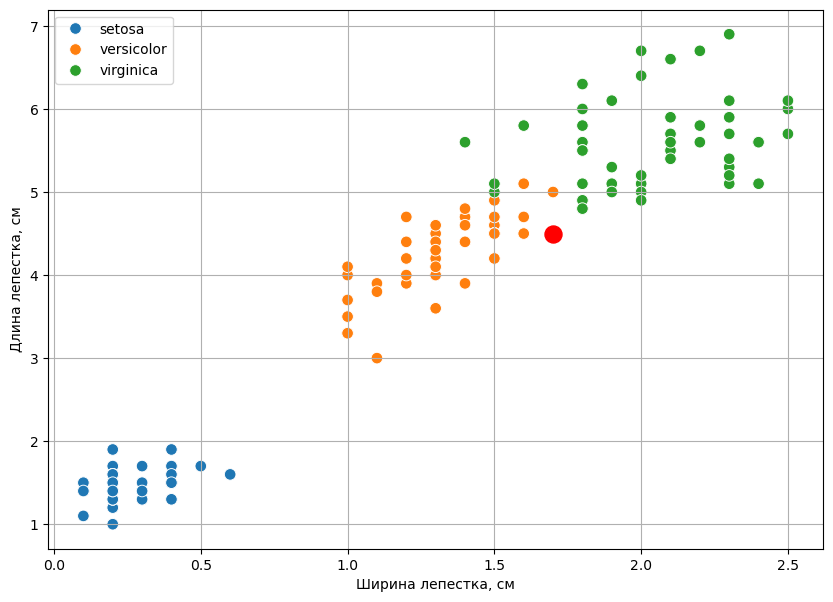

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

iris = sns.load_dataset('iris')

x_train, x_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15,
    random_state = 300
)

print(f"Размеры данных:")
print(f"Обучающая выборка: x_train={x_train.shape}, y_train={y_train.shape}")
print(f"Тестовая выборка: x_test={x_test.shape}, y_test={y_test.shape}")
print("Примеры данных из обучающей выборки:")
print(x_train.head(2))
print(y_train.head(2))

model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Предсказания на тестовых данных:")
print(y_pred)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species', s=70)

plt.xlabel('Ширина лепестка, см')
plt.ylabel('Длина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if y_test.iloc[i] != y_pred[i]:
        plt.scatter(
            x_test.iloc[i, 3], x_test.iloc[i, 2],
            color='red', s=150
        )

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.3f}")

plt.show()

3.3.2 Определите набор признаков человека, по аналогии из РТ 1, – например, 
цвет глаз и конвертируйте его в матрицу признаков.

In [ ]:
import pandas as pd

data = {
    'eye_color': ['blue', 'green', 'brown', 'blue', 'brown'],
    'hair_color': ['blonde', 'black', 'brown', 'red', 'black'],
    'height_cm': [170, 165, 180, 175, 160],
    'weight_kg': [65, 70, 80, 75, 55]  
}

df = pd.DataFrame(data)
df_encoded = pd.get_dummies(df, columns=['eye_color', 'hair_color'])

print("Исходные данные:")
print(df)
print("\nМатрица признаков:")
print(df_encoded)

Исходные данные:
  eye_color hair_color  height_cm  weight_kg
0      blue     blonde        170         65
1     green      black        165         70
2     brown      brown        180         80
3      blue        red        175         75
4     brown      black        160         55

Матрица признаков:
   height_cm  weight_kg  eye_color_blue  eye_color_brown  eye_color_green  \
0        170         65            True            False            False   
1        165         70           False            False             True   
2        180         80           False             True            False   
3        175         75            True            False            False   
4        160         55           False             True            False   

   hair_color_black  hair_color_blonde  hair_color_brown  hair_color_red  
0             False               True             False           False  
1              True              False             False           False  
2    